In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [118]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))

In [119]:
datax_norm = datax/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


In [120]:
datax_reshape = datax_norm.reshape([60000, 28*28])

In [156]:
##Input
Input_shape = (28*28,)
Input_tensor = layers.Input(Input_shape)

## Encoder
encoder1 = layers.Dense(600, activation='relu')(Input_tensor)
encoder2 = layers.Dense(400, activation='relu')(encoder1)
encoder3 = layers.Dense(200, activation='relu')(encoder2)

latent_tensor = encoder3

## Decoder
decoder1 = layers.Dense(400, activation='relu', name='latent_layer_0')(latent_tensor)
decoder2 = layers.Dense(600, activation='relu')(decoder1)

## Outputs
reconstruction_output = layers.Dense(28*28, activation='relu')(decoder2)

In [157]:
ae = models.Model(Input_tensor, reconstruction_output)
ae.compile(optimizer='Adam', loss='mse')

In [158]:
ae.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_46 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_47 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_48 (Dense)             (None, 200)               80200     
_________________________________________________________________
latent_layer_0 (Dense)       (None, 400)               80400     
_________________________________________________________________
dense_49 (Dense)             (None, 600)               240600    
_________________________________________________________________
dense_50 (Dense)             (None, 784)               471

In [159]:
#parameter
epoch = 10
batch_size = 1024

ae.fit(datax_reshape, datax_reshape, batch_size=batch_size, epochs=epoch, verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 4s - loss: 0.0477
Epoch 2/10
60000/60000 - 3s - loss: 0.0194
Epoch 3/10
60000/60000 - 3s - loss: 0.0145
Epoch 4/10
60000/60000 - 3s - loss: 0.0122
Epoch 5/10
60000/60000 - 3s - loss: 0.0108
Epoch 6/10
60000/60000 - 3s - loss: 0.0100
Epoch 7/10
60000/60000 - 4s - loss: 0.0093
Epoch 8/10
60000/60000 - 4s - loss: 0.0090
Epoch 9/10
60000/60000 - 4s - loss: 0.0084
Epoch 10/10
60000/60000 - 4s - loss: 0.0081


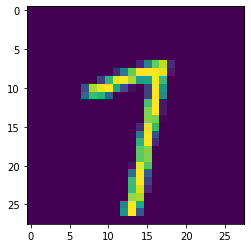

In [160]:
#원본 데이터 확인
plt.imshow(datax_reshape[42].reshape(28,28))

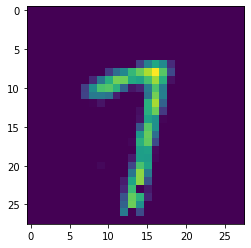

In [161]:
decoded_img = ae.predict(datax_reshape[42].reshape(1, 28*28))
decoded_img = decoded_img.reshape(28,28)

plt.imshow(decoded_img)

In [162]:
np.mean(np.abs(datax_reshape[42] - decoded_img.reshape(784,1)))

0.11588065713502844

In [163]:
random_vector = np.random.rand(784,1)

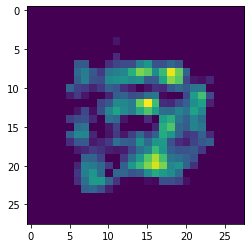

In [164]:
decoded_img = ae.predict(random_vector.reshape(1, 28*28))
decoded_img = decoded_img.reshape(28,28)

plt.imshow(decoded_img)

In [165]:
np.mean(np.abs(random_vector - decoded_img.reshape(784,1)))

0.44479510743868567

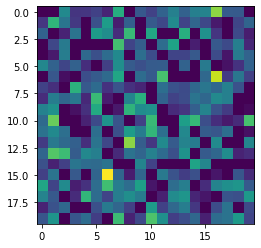

In [166]:
intermediate_layer_model = models.Model(inputs=ae.input, outputs=ae.get_layer('latent_layer_0').output)
intermediate_output = intermediate_layer_model.predict(datax_reshape[42].reshape(1, 28*28))

latent_vector = np.array(intermediate_output)

plt.imshow(latent_vector.reshape(20,20))

In [167]:
datax_reshape = datax_norm.reshape((-1, 28, 28, 1))
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


In [168]:
##Input
input_shape = (28, 28, 1)
input_tensor = layers.Input(input_shape)

##Encoder
conv_1 = layers.Conv2D(1, (5,5), padding='same', activation='relu')(input_tensor)
pooling_1 = layers.MaxPool2D(name='latent_layer')(conv_1)

latent_tensor = pooling_1

##Decoding
deconv_2 = layers.Conv2DTranspose(1, (5,5), padding='same', activation='relu')(latent_tensor)
upsample_3 = layers.UpSampling2D()(deconv_2)

##Outputs
output_tensor = layers.Conv2DTranspose(1, (5,5), padding='same', activation='sigmoid')(upsample_3)

In [169]:
ae = models.Model(input_tensor, output_tensor)
ae.compile(optimizer='Adam', loss='mse')

In [170]:
ae.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 1)         26        
_________________________________________________________________
latent_layer (MaxPooling2D)  (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 14, 14, 1)         26        
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 28, 28, 1)         26        
Total params: 78
Trainable params: 78
Non-trainable params: 0
______________________________________________________________

In [171]:
#parameter
epoch = 10
batch_size = 1024

ae.fit(datax_reshape, datax_reshape, batch_size=batch_size, epochs=epoch, verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 15s - loss: 0.1928
Epoch 2/10
60000/60000 - 14s - loss: 0.1537
Epoch 3/10
60000/60000 - 14s - loss: 0.1208
Epoch 4/10
60000/60000 - 14s - loss: 0.0939
Epoch 5/10
60000/60000 - 14s - loss: 0.0837
Epoch 6/10
60000/60000 - 14s - loss: 0.0783
Epoch 7/10
60000/60000 - 14s - loss: 0.0740
Epoch 8/10
60000/60000 - 14s - loss: 0.0697
Epoch 9/10
60000/60000 - 14s - loss: 0.0646
Epoch 10/10
60000/60000 - 14s - loss: 0.0574


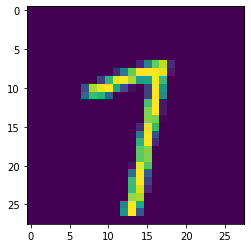

In [172]:
#원본 데이터 확인
plt.imshow(datax_reshape[42].reshape(28,28))

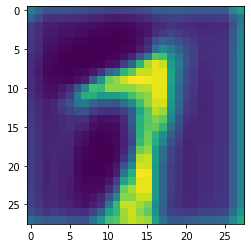

In [173]:
#데이터를 모델에 넣고 복원
decoded_img = ae.predict(datax_reshape[42].reshape(1,28, 28,1))
decoded_img = decoded_img.reshape(28,28)

#복원된 데이터 확인
plt.imshow(decoded_img)

In [174]:
np.mean(np.abs(datax_reshape[42].reshape(784,1) - decoded_img.reshape(784,1)))

0.1174763750386762

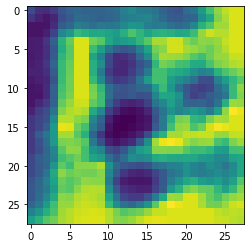

In [175]:
random_vector = np.random.rand(784,1)

decoded_img = ae.predict(random_vector.reshape(1,28, 28,1))
decoded_img = decoded_img.reshape(28,28)

plt.imshow(decoded_img)

In [176]:
np.mean(np.abs(random_vector - decoded_img.reshape(784,1)))

0.3007858952969856

In [177]:
intermediate_layer_model = models.Model(inputs=ae.input, outputs=ae.get_layer('latent_layer').output)
intermediate_output = intermediate_layer_model.predict(datax_reshape[42].reshape(1,28, 28,1))

In [178]:
latent_vector = np.array(intermediate_output)

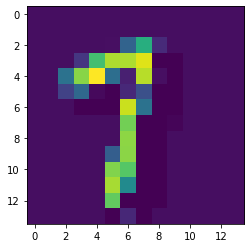

In [179]:
plt.imshow(latent_vector.reshape(14,14))